<a href="https://colab.research.google.com/github/Chamara-g/pre-datastorm-v1-0/blob/master/pre_data_storm_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [6]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_train.csv", index_col=0)
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [26]:
#read test data set
df_test = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_test.csv", index_col=0)
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A20170,500K,M,Other,Single,31-45,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
A16887,200K,F,Other,Single,31-45,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
A3430,400K,M,Other,Other,Less than 30,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060
A3696,1.5M,M,Graduate,Single,31-45,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0
A20474,100K,F,High School,Other,Less than 30,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#test data set pre processing

#convet to string balance limit to float
df_test.Balance_Limit_V1 = (df_test.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df_test.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df_test.head()

#gender education marital age stringto int convert
df_test.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df_test.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df_test.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df_test.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)

#df.PAY_JULY.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_AUG.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_SEP.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_OCT.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_NOV.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_DEC.replace([-2, -1], [11, 13], inplace=True)

df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


**Univariant Selection**

In [0]:
X = df.drop("NEXT_MONTH_DEFAULT",1)   #Feature Matrix
y = df["NEXT_MONTH_DEFAULT"]          #Target Variable

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 10 best features

             Feature        Score
5           PAY_JULY  2821.720487
6            PAY_AUG  1747.509329
7            PAY_SEP  1332.272524
8            PAY_OCT  1133.864880
9            PAY_NOV  1012.782178
10           PAY_DEC   870.510529
0   Balance_Limit_V1   544.413586
17     PAID_AMT_JULY   128.185743
18      PAID_AMT_AUG    83.939549
19      PAID_AMT_SEP    80.464002
20      PAID_AMT_OCT    75.880451
21      PAID_AMT_NOV    69.788740
22      PAID_AMT_DEC    66.241699
1             Gender    41.700850
2   EDUCATION_STATUS    36.373624
3     MARITAL_STATUS    18.701558
11      DUE_AMT_JULY     9.612801
12       DUE_AMT_AUG     5.531152
13       DUE_AMT_SEP     5.202269
14       DUE_AMT_OCT     2.283794
15       DUE_AMT_NOV     1.391450
16       DUE_AMT_DEC     1.020606
4                AGE     0.854891


**Feature Importance**

[0.04733244 0.0133914  0.02654287 0.0160839  0.03359354 0.09500025
 0.05378586 0.03057722 0.03200215 0.03512663 0.03346068 0.05670818
 0.05088031 0.04928123 0.0480908  0.04750487 0.04850621 0.04808962
 0.04579504 0.04617877 0.04455362 0.04689497 0.05061945]


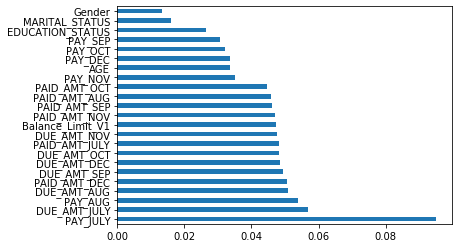

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

**Recursive Feature Elimination**

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True False False False False False False False False False False  True
 False  True  True  True False  True  True  True  True  True False]
Feature Ranking: [ 1 13 14 12  5  6  7  8  9 10 11  1  2  1  1  1  4  1  1  1  1  1  3]


In [60]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 23 features.
15 selected features
['Balance_Limit_V1', 'AGE', 'PAY_JULY', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']


In [10]:
selectedFeatures = featureScores.nlargest(24,'Score')
df_24F = df[selectedFeatures['Feature'].values]
# df_24F['NEXT_MONTH_DEFAULT'] = y
df_24F.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,Balance_Limit_V1,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender,EDUCATION_STATUS,MARITAL_STATUS,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,AGE
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A2,-1,-1,-1,-1,-1,-1,1000000.0,3437,6004,39418,162772,0,538165,1,2,1,3248,3389,6004,39418,162772,-13982,2
A3,0,-1,-1,-1,-1,0,1000000.0,151818,46200,43530,80811,942,33666,0,1,1,353351,151818,26948,43530,80811,124590,3
A4,4,3,2,2,-2,-2,100000.0,0,0,0,0,0,0,0,1,0,16681,16082,15477,0,0,0,2
A5,2,0,0,0,0,0,200000.0,3855,3890,3696,4620,4049,3918,0,2,0,90457,92848,95193,97309,100353,102740,2
A6,2,2,0,0,0,0,1000000.0,0,20790,16170,17325,16401,17325,0,2,1,429556,419466,429785,435354,445271,453899,2


In [0]:
def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

def returnScoreDataFrameModels(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in [24, 23, 22, 21, 20, 19, 18, 17, 16 , 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:

    # lists1.append(svmLinear(dataFrame.iloc[:,0:(i)], y))
    # lists2.append(svmGaussian(dataFrame.iloc[:,0:(i)], y))
    lists3.append(randomForest(dataFrame.iloc[:,0:(i)], y))

  rows = ["randomForest"]

  data = np.array([lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib.pyplot as plt

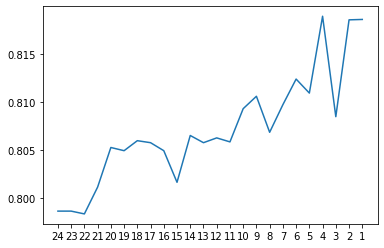

In [13]:
randomForestScore = returnScoreDataFrameModels(df_24F)

pcaScore = ["24", "23", "22", "21", "20", "19", "18", "17", "16" , "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"] 

plt.plot(pcaScore, randomForestScore["randomForest"], label='linear')


In [14]:
randomForestScore

,randomForest
0,0.798667
1,0.798667
2,0.798375
3,0.801167
4,0.805292
5,0.804958
6,0.806000
7,0.805792
8,0.804958
9,0.801667


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import train_test_split 

In [0]:
def printClassificationResults(X_train, X_test, y_train, y_test):    
  
  # gnb_clf = GaussianNB() 
  # score_gnb = cross_val_score(gnb_clf, X_train, y_train, cv=3)
  # gnb_clf.fit(X_train, y_train) 

  # dt_clf = DecisionTreeClassifier()
  # score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  # dt_clf.fit(X_train, y_train) 

  # knn_clf = KNeighborsClassifier(n_neighbors=2)
  # score_knn = cross_val_score(knn_clf, X_train, y_train, cv=3)
  # knn_clf.fit(X_train, y_train)

  #svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  #score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  #svm_li_clf.fit(X_train, y_train)

  # svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  # score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  # svm_rbf_clf.fit(X_train, y_train)

  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)
    
  # making predictions on the testing set 
  # y_pred_gnb = gnb_clf.predict(X_test) 
  # y_pred_dt = dt_clf.predict(X_test) 
  # y_pred_knn = knn_clf.predict(X_test)
  #y_pred_svm_li = svm_li_clf.predict(X_test)
  # y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t Testing\t Training")
  # print("Gaussian Naive Bayes model accuracy(in %) \t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_gnb)*100,2) ,"\t", round(score_gnb.mean()*100,2))
  # print("Decision Tree model accuracy(in %) \t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_dt)*100,2) ,"\t", round(score_dt.mean()*100,2))
  # print("Nearest Neighbors model accuracy(in %) \t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_knn)*100,2) ,"\t", round(score_knn.mean()*100,2))
  # print("SVM + Gaussian kernel model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) ,"\t", round(score_svm_rbf.mean()*100,2))
  #print("SVM + linear kerne model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) ,"\t", round(score_svm_li.mean()*100,2))
  print("Random forest model accuracy(in %) \t \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) ,"\t", round(score_RF.mean()*100,2))

In [61]:
#selected_col_names = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC",	"Balance_Limit_V1",	"PAID_AMT_JULY",	"PAID_AMT_AUG",	"PAID_AMT_SEP"]
selected_col_names = ['Balance_Limit_V1', 'AGE', 'PAY_JULY', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']
X_selected = df_24F[selected_col_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1) 
printClassificationResults(X_train, X_test, y_train, y_test)

						 Testing	 Training
Random forest model accuracy(in %) 	 	: 78.26 	 77.59


In [0]:
X_train = X_selected
y_train = y

In [36]:
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
X_test = df_test[selected_col_names]
y_pred_RF = RF_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_RF
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_out = df_test['NEXT_MONTH_DEFAULT']
df_out.to_csv('drive/My Drive/FYP/dataset/credit_card_output_univeriant_F10.csv', encoding='utf-8', mode='w', header=["NEXT_MONTH_DEFAULT"], index=True)